  Compte  Capital initial (€)  Valeur finale brute (€)  Impôt payé (€)  \
0    PEA                 5000              7346.640384      403.622146   
1    CTO                 5000              7346.640384      703.992115   

   Valeur nette finale (€)  Gain net (€)  
0              6943.018238   1943.018238  
1              6642.648269   1642.648269  


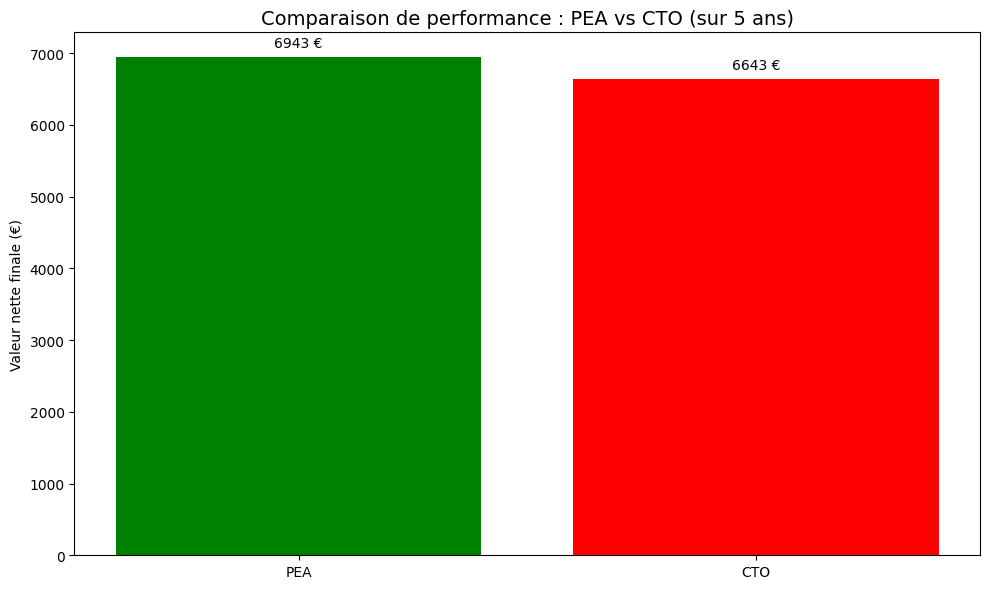

In [1]:
# Titre : Comparaison PEA vs CTO - Analyse de base
# Contenu : Votre premier script simplifié avec explications

"""
# Introduction
Expliquer les différences fiscales entre PEA et CTO
- PEA : PS après 5 ans (17.2%)
- CTO : PFU (30%)
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Section 1 : Investissement initial unique

#Paramètres de base
capital_pea = 5000  # Montant investi dans le PEA
capital_cto = 5000  # Montant investi dans le CTO
years = 5
annual_return = 0.08  # Rendement annuel moyen (8%)

#Fiscalité
fiscal_pea = 0.172  # Prélèvements sociaux après 5 ans
fiscal_cto = 0.30   # PFU (impôt + prélèvements sociaux)

#Calcul des valeurs finales
def final_value(capital, rate, years):
    return capital * ((1 + rate) ** years)

def net_gain(gross_final, initial, tax_rate):
    gain = gross_final - initial
    tax = gain * tax_rate
    return gross_final - tax, gain - tax

#Valeurs finales brutes
pea_gross = final_value(capital_pea, annual_return, years)
cto_gross = final_value(capital_cto, annual_return, years)

#Valeurs finales nettes
pea_net, pea_gain_net = net_gain(pea_gross, capital_pea, fiscal_pea)
cto_net, cto_gain_net = net_gain(cto_gross, capital_cto, fiscal_cto)

#Préparer le tableau récapitulatif
data = {
    "Compte": ["PEA", "CTO"],
    "Capital initial (€)": [capital_pea, capital_cto],
    "Valeur finale brute (€)": [pea_gross, cto_gross],
    "Impôt payé (€)": [pea_gross - pea_net, cto_gross - cto_net],
    "Valeur nette finale (€)": [pea_net, cto_net],
    "Gain net (€)": [pea_gain_net, cto_gain_net]
}

df = pd.DataFrame(data)

#Tracer les résultats
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df["Compte"], df["Valeur nette finale (€)"], color=["green", "red"])
ax.set_title("Comparaison de performance : PEA vs CTO (sur 5 ans)", fontsize=14)
ax.set_ylabel("Valeur nette finale (€)")
ax.bar_label(bars, fmt='%.0f €', padding=5)
plt.tight_layout()

print(df)
plt.show()